### Aerofit BCS Problem statement:
We have data for 180 customers who have purcahsed one of 3 aerofit treadmills. This data can help us create customer profiles for each type of product based on their gender, age, level of usage and fitness along with other factors such as marital status, income and education.

In [1]:
import pandas as pd
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [3]:
# Identifying the unique values for Discrete variables
for i in df.columns:
    if df.loc[:,i].dtype=="object":
        print(i, df.loc[:,i].unique())

Product ['KP281' 'KP481' 'KP781']
Gender ['Male' 'Female']
MaritalStatus ['Single' 'Partnered']


In [4]:
# Since fitness score is more of a categorical data, we will change its data type to category
df["Fitness"] = df["Fitness"].astype("category")
df.Fitness.dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

In [5]:
# Identifying the unique values for Education
df.Education.unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

Looking at the unique values of education in years, we can further categorise this into three sub categories as SchoolGraduate (12 years), Undergraduate (13-16 years) and Postgraduate (>= 17 years)

In [6]:
df["education_category"] = pd.cut(df["Education"], bins=[10, 12, 16, 21],
       labels=["SchoolGraduate", "Undergraduate", "Postgraduate"])
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,education_category
0,KP281,18,Male,14,Single,3,4,29562,112,Undergraduate
1,KP281,19,Male,15,Single,2,3,31836,75,Undergraduate
2,KP281,19,Female,14,Partnered,4,3,30699,66,Undergraduate
3,KP281,19,Male,12,Single,3,3,32973,85,SchoolGraduate
4,KP281,20,Male,13,Partnered,4,2,35247,47,Undergraduate


In [7]:
# Analyzing the Income spread
print("Minimum income: ", df.Income.min())
print("Maximum income: ", df.Income.max())
df.Income.unique()

Minimum income:  29562
Maximum income:  104581


array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [8]:
df["income_bracket"] = pd.cut(df["Income"], bins=[20_000, 40_000, 60_000, 80_000, 100_000, 120_000],
       labels=["<40K", "40K-60K", "60K-80K", "80K-100K", ">100K" ])
df["income_bracket"].value_counts()

income_bracket
40K-60K     106
<40K         32
60K-80K      23
80K-100K     16
>100K         3
Name: count, dtype: int64

In [9]:
# Analyzing the Age spread
print("Minimum Age: ", df.Age.min())
print("Maximum Age: ", df.Age.max())
df.Age.unique()

Minimum Age:  18
Maximum Age:  50


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [10]:
df["age_group"] = pd.cut(df["Age"], bins=[15, 20, 30, 40, 50],
       labels=["<20", "20-30", "30-40", "40-50"])
df["age_group"].value_counts()

age_group
20-30    110
30-40     48
40-50     12
<20       10
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Product             180 non-null    object  
 1   Age                 180 non-null    int64   
 2   Gender              180 non-null    object  
 3   Education           180 non-null    int64   
 4   MaritalStatus       180 non-null    object  
 5   Usage               180 non-null    int64   
 6   Fitness             180 non-null    category
 7   Income              180 non-null    int64   
 8   Miles               180 non-null    int64   
 9   education_category  180 non-null    category
 10  income_bracket      180 non-null    category
 11  age_group           180 non-null    category
dtypes: category(4), int64(5), object(3)
memory usage: 12.8+ KB


In [12]:
# Checking for null values for each column
df.isnull().any()

Product               False
Age                   False
Gender                False
Education             False
MaritalStatus         False
Usage                 False
Fitness               False
Income                False
Miles                 False
education_category    False
income_bracket        False
age_group             False
dtype: bool

> No rows contain any null values 

In [13]:
# Checking for number of unique values for each column
df.nunique()

Product                3
Age                   32
Gender                 2
Education              8
MaritalStatus          2
Usage                  6
Fitness                5
Income                62
Miles                 37
education_category     3
income_bracket         5
age_group              4
dtype: int64

In [14]:
df.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


> Looking at a higher value of standard deviation for **Age**, **Income**, and **Miles**, the values are quite spread out. Hence we will take only those data containing 5 to 95% percentile of those values.

In [15]:
import numpy as np
import math
age_lower_limit = math.floor(np.percentile(df["Age"].unique(), 5))
age_upper_limit = math.floor(np.percentile(df["Age"].unique(), 95))
age_mask = np.clip(df["Age"].unique(), age_lower_limit, age_upper_limit)

income_lower_limit = math.floor(np.percentile(df["Income"].unique(), 5))
income_upper_limit = math.floor(np.percentile(df["Income"].unique(), 95))
income_mask = np.clip(df["Income"].unique(), income_lower_limit, income_upper_limit)

miles_lower_limit = math.floor(np.percentile(df["Miles"].unique(), 5))
miles_upper_limit = math.floor(np.percentile(df["Miles"].unique(), 95))
miles_mask = np.clip(df["Miles"].unique(), miles_lower_limit, miles_upper_limit)

In [16]:
# Creating a new data frame containing only 5 to 95 percentile of values for Age, Income and Miles
df_filtered = df[(df["Age"].isin(age_mask)) & (df["Income"].isin(
    income_mask)) & (df["Miles"].isin(miles_mask))].reset_index()
df_filtered.drop("index", axis=1, inplace=True)
df_filtered.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,education_category,income_bracket,age_group
0,KP281,20,Male,13,Partnered,4,2,35247,47,Undergraduate,<40K,<20
1,KP281,21,Female,14,Partnered,3,3,35247,75,Undergraduate,<40K,20-30
2,KP281,21,Male,15,Single,5,4,35247,141,Undergraduate,<40K,20-30
3,KP281,21,Female,15,Partnered,2,3,37521,85,Undergraduate,<40K,20-30
4,KP281,22,Male,14,Single,3,3,36384,85,Undergraduate,<40K,20-30


In [17]:
df_filtered.shape

(157, 12)

> After only keeping values of 5-95 percentile of columns age, income and miles, we have 157 rows

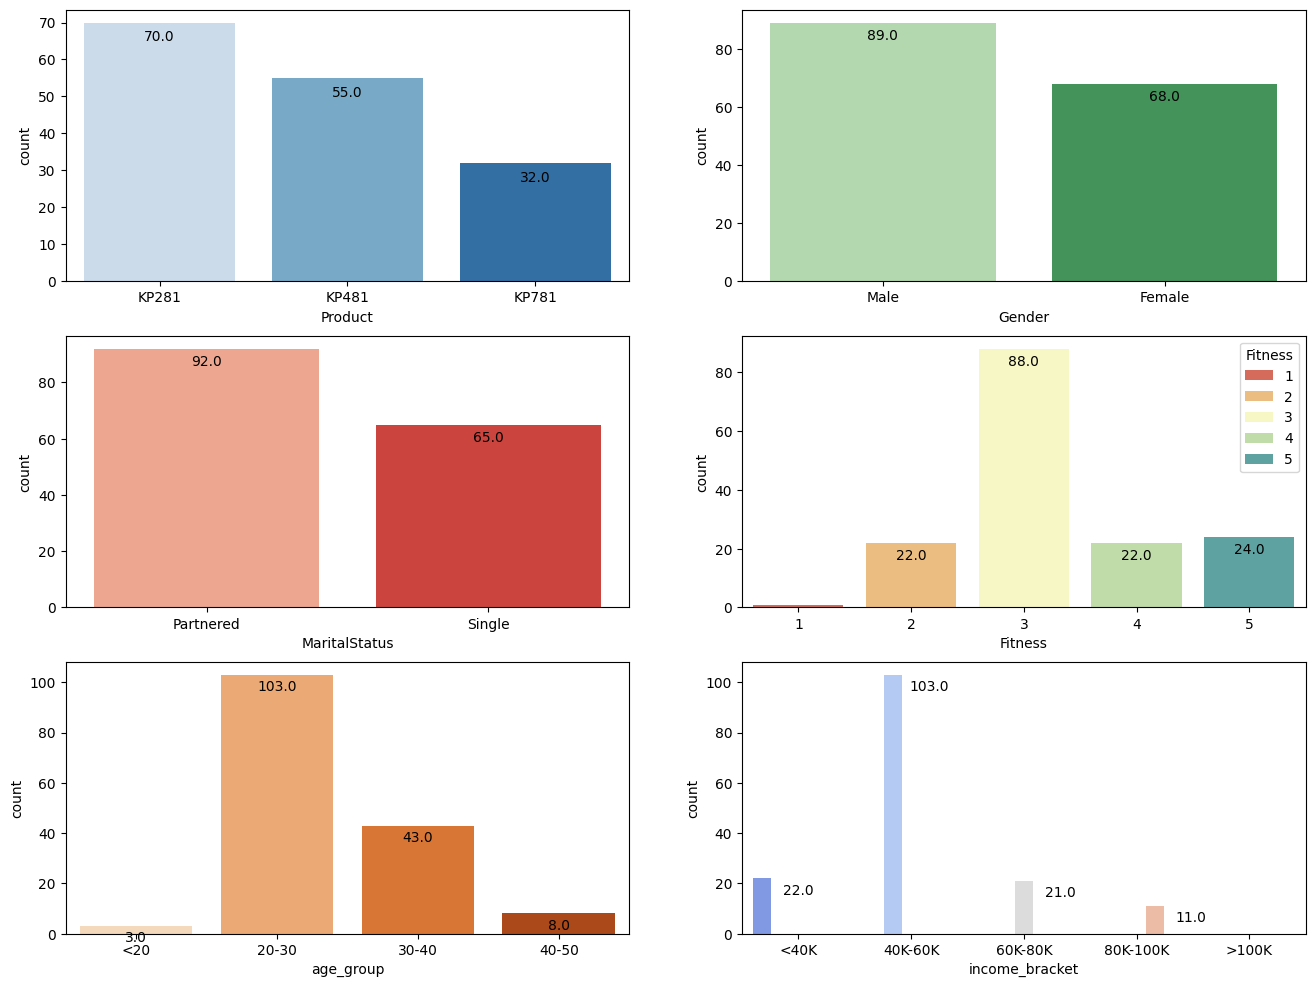

In [18]:
# Finding Count of Discrete variables
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 2, figsize=(16,12))
axe = sns.countplot(ax=axes[0, 0], data=df_filtered, x="Product",
                    hue="Product", palette="Blues")
for patch in axe.patches:
    axe.annotate(patch.get_height(), (patch.get_x()+0.4,
                 patch.get_height()-2), ha='center', va='top')
axe = sns.countplot(ax=axes[0, 1], data=df_filtered, x="Gender",
                    hue="Gender", palette="Greens")
for patch in axe.patches:
    axe.annotate(patch.get_height(), (patch.get_x()+0.4,
                 patch.get_height()-2), ha='center', va='top')
axe = sns.countplot(ax=axes[1, 0], data=df_filtered,
                    x="MaritalStatus", hue="MaritalStatus", palette="Reds")
for patch in axe.patches:
    axe.annotate(patch.get_height(), (patch.get_x()+0.4,
                 patch.get_height()-2), ha='center', va='top')
axe = sns.countplot(ax=axes[1, 1], data=df_filtered,
                    x="Fitness", hue="Fitness", palette="Spectral")
for patch in axe.patches:
    axe.annotate(patch.get_height(), (patch.get_x()+0.4,
                 patch.get_height()-2), ha='center', va='top')
axe = sns.countplot(ax=axes[2, 0], data=df_filtered,
                    x="age_group", hue="age_group", palette="Oranges")
for patch in axe.patches:
    axe.annotate(patch.get_height(), (patch.get_x()+0.4,
                 patch.get_height()-2), ha='center', va='top')
axe = sns.countplot(ax=axes[2, 1], data=df_filtered,
                    x="income_bracket", hue="income_bracket", palette="coolwarm")
for patch in axe.patches:
    axe.annotate(patch.get_height(), (patch.get_x()+0.4,
                 patch.get_height()-2), ha='center', va='top')
plt.show()

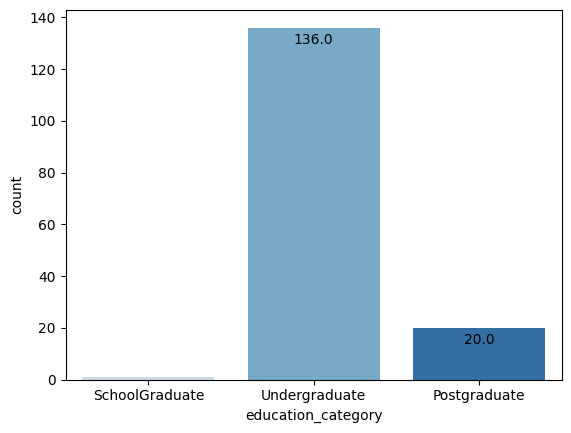

In [19]:
ax = sns.countplot(data=df_filtered,
                    x="education_category", hue="education_category", palette="Blues")
for patch in ax.patches:
    ax.annotate(patch.get_height(), (patch.get_x()+0.4,
                 patch.get_height()-2), ha='center', va='top')
plt.show()

From the above plots we can infer the following:
- Most customers are :
    - **Partnered**
    - **Undergraduates**
    - **Males**
    - Aged between 20-30 years of age
    - Have an income Bracket of between 40,000-60,000$
- Highest selling product : **KP281**. 
- It is also observed that in terms of customers' fitness score, most customers rate themselves as **"3"**

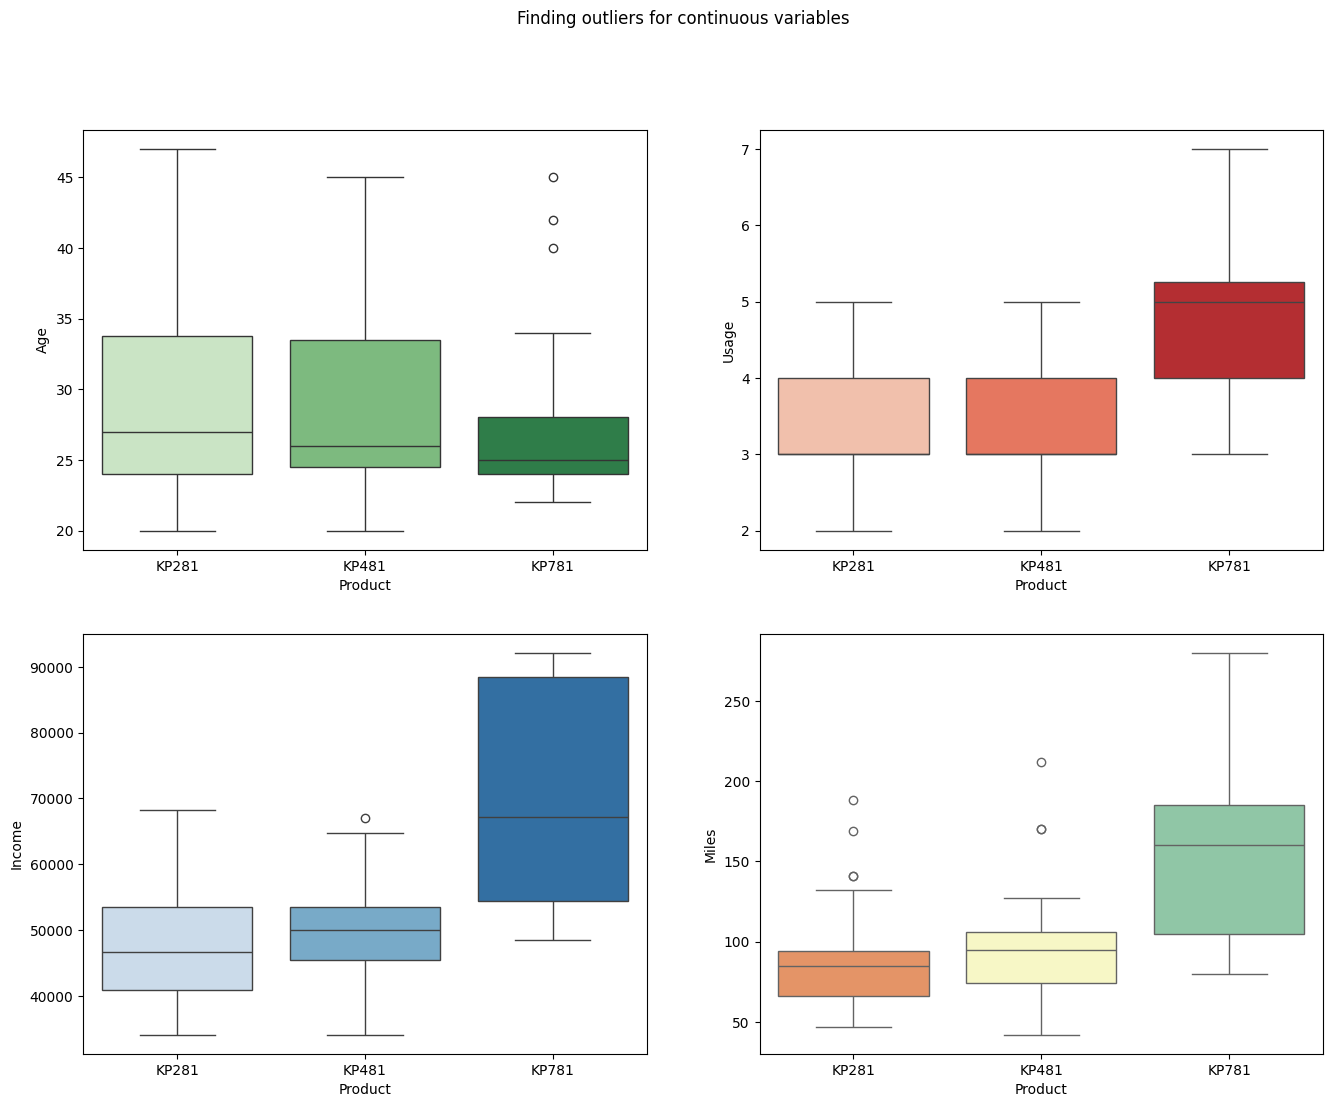

In [20]:
# Detecting Outliers For continuous variables
fig, ax = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle('Finding outliers for continuous variables')
sns.boxplot(ax=ax[0, 0], data=df_filtered, hue="Product", x="Product", y="Age", palette="Greens")
sns.boxplot(ax=ax[0, 1], data=df_filtered, hue="Product", x="Product", y="Usage", palette="Reds")
sns.boxplot(ax=ax[1, 0], data=df_filtered, hue="Product", x="Product", y="Income", palette="Blues")
sns.boxplot(ax=ax[1, 1], data=df_filtered, hue="Product", x="Product", y="Miles", palette="Spectral")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


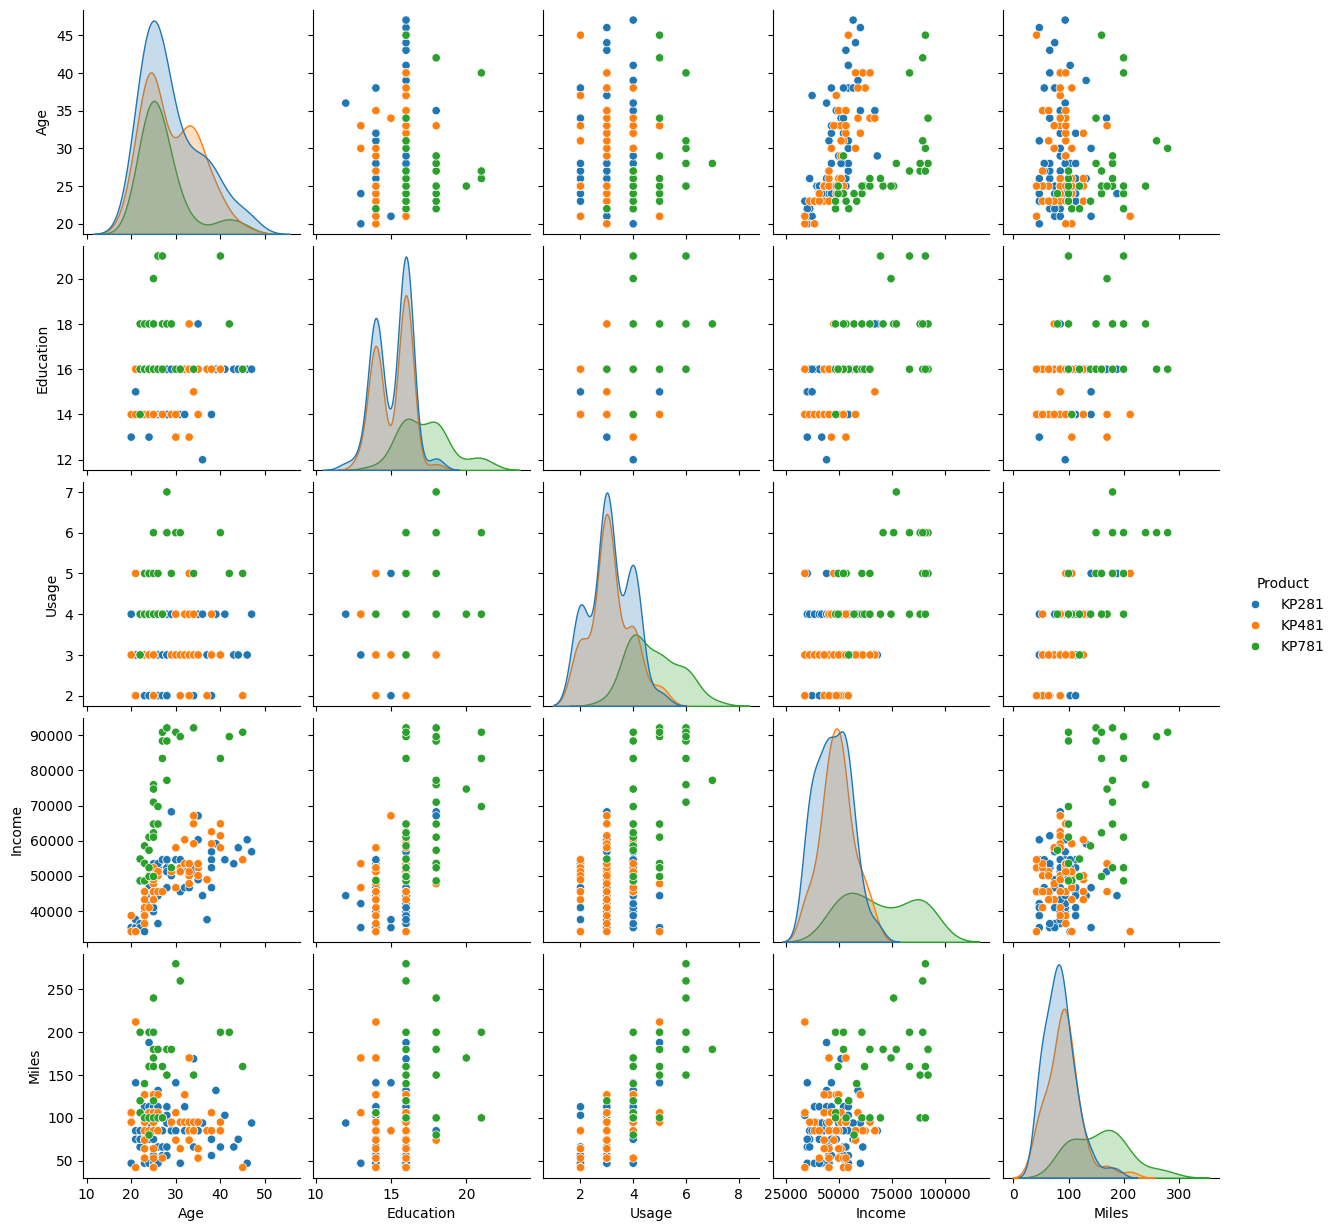

In [21]:
# Finding the relationship between the product types and continuous variables
sns.pairplot(data=df_filtered, hue="Product")
plt.show()

From the above scatter plots, as per the clusters observed we infer the following:
- **KP781 Customers observations:** Higher usage, higher miles, higher income bracket, higher Education, lower age group overall.
- **KP481 Customers observations:** Lower usage, lower miles, lower income bracket lower education, and about a little higher age compared to the KP781 customers.
- **KP281 Customers observations:** Lower usage, lower miles, lower income bracket lower education, and about a little higher age compared to the KP481 customers.

In [22]:
# Creating a new data frame containing only the continuous variables for correlation analysis
df_filtered_cv = df_filtered[["Age", "Education", "Usage", "Income", "Miles"]]

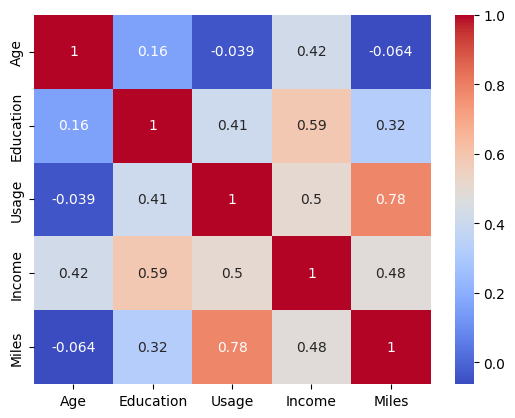

In [23]:
# Finding correlation between different continuous variables
sns.heatmap(df_filtered_cv.corr(), cmap="coolwarm", annot=True)
plt.show()

With the above heatmap, we can infer the following:

- There is a strong correlation observed between miles and usage, the second highest correlation is observed between income and education and the third highest is observed between income and usage, i.e., higher the usage, higher the miles, higher the income, higher the education.
- A strong negative correlation is also observed between age and usage, along with age and miles, i.e., Lower the age, higher the usage and miles.

In [24]:
# Creating separate dfs for the 3 products (KP781, KP481, KP281) for performing probability analysis
df_781 = df_filtered[df_filtered["Product"] == "KP781"]
df_481 = df_filtered[df_filtered["Product"] == "KP481"]
df_281 = df_filtered[df_filtered["Product"] == "KP281"]

## Representing the Probabilities and creating customer profiles for KP781

In [25]:
pd.crosstab(df_781["Gender"], df_781["income_bracket"], margins=True, normalize=True)

income_bracket,40K-60K,60K-80K,80K-100K,All
Gender,,,,
Female,0.06250,0.0625,0.06250,0.1875
Male,0.28125,0.2500,0.28125,0.8125
All,0.34375,0.3125,0.34375,1.0000


Overall, about 35% of the customers are under the income bracket 40,000-60,000 and 80,000-100,000 each majority of which are males

In [26]:
pd.crosstab(df_781["age_group"],
            df_781["education_category"], margins=True, normalize=True)

education_category,Undergraduate,Postgraduate,All
age_group,,,
20-30,0.37500,0.46875,0.84375
30-40,0.06250,0.03125,0.09375
40-50,0.03125,0.03125,0.06250
All,0.46875,0.53125,1.00000


About 47% of customers aged between 20-30 years of age are postgraduates and account for majority.

In [27]:
pd.crosstab(df_781["age_group"],
            df_781["Fitness"], margins=True, normalize=True)

Fitness,3,4,5,All
age_group,,,,
20-30,0.125,0.15625,0.56250,0.84375
30-40,0.000,0.00000,0.09375,0.09375
40-50,0.000,0.03125,0.03125,0.06250
All,0.125,0.18750,0.68750,1.00000


Abuot 56% of the Customers identify as a fitness level 5 who are between age 20-30 years account for majority.

In [28]:
pd.crosstab(df_781["Gender"],
            df_781["age_group"], margins=True, normalize=True)

age_group,20-30,30-40,40-50,All
Gender,,,,
Female,0.18750,0.00000,0.0000,0.1875
Male,0.65625,0.09375,0.0625,0.8125
All,0.84375,0.09375,0.0625,1.0000


About 65% of Males aged between 20-30 years account for majority.

With the above data, the target prospective customers with a higher probability of buying the KP781 would have the following traits:
- Fitness level 5
- Higher education : 16+ years of Education
- Males aged 20-30years
- Earning between 80k-100k

## Representing the Probabilities and creating customer profiles for KP481

In [29]:
pd.crosstab(df_481["Gender"], df_481["income_bracket"], margins=True, normalize=True)

income_bracket,<40K,40K-60K,60K-80K,All
Gender,,,,
Female,0.036364,0.418182,0.054545,0.509091
Male,0.072727,0.363636,0.054545,0.490909
All,0.109091,0.781818,0.109091,1.000000


Overall, about 78% of the customers are under the income bracket 40,000-60,000 majority of which are females at ~42%

In [30]:
pd.crosstab(df_481["age_group"],
            df_481["education_category"], margins=True, normalize=True)

education_category,Undergraduate,Postgraduate,All
age_group,,,
<20,0.036364,0.000000,0.036364
20-30,0.545455,0.000000,0.545455
30-40,0.381818,0.018182,0.400000
40-50,0.018182,0.000000,0.018182
All,0.981818,0.018182,1.000000


About 55% of customers aged between 20-30 years of age are undergraduates and account for majority.

In [31]:
pd.crosstab(df_481["age_group"],
            df_481["Fitness"], margins=True, normalize=True)

Fitness,2,3,4,All
age_group,,,,
<20,0.000000,0.036364,0.000000,0.036364
20-30,0.127273,0.327273,0.090909,0.545455
30-40,0.054545,0.290909,0.054545,0.400000
40-50,0.018182,0.000000,0.000000,0.018182
All,0.200000,0.654545,0.145455,1.000000


Abuot 65% of the Customers identify as a fitness level 3. Customers between age 20-30 years account for majority.

In [32]:
pd.crosstab(df_481["Gender"],
            df_481["age_group"], margins=True, normalize=True)

age_group,<20,20-30,30-40,40-50,All
Gender,,,,,
Female,0.018182,0.290909,0.2,0.000000,0.509091
Male,0.018182,0.254545,0.2,0.018182,0.490909
All,0.036364,0.545455,0.4,0.018182,1.000000


About 29% of Females aged between 20-30 years account for majority.

With the above data, the target prospective customers with a higher probability of buying the KP481 would have the following traits:
- Fitness level 3
- Higher education : 13-16 years of Education
- Females aged 20-30years
- Earning between 40k-60k

## Representing the Probabilities and creating customer profiles for KP281

In [33]:
pd.crosstab(df_281["Gender"], df_281["income_bracket"], margins=True, normalize=True)

income_bracket,<40K,40K-60K,60K-80K,All
Gender,,,,
Female,0.142857,0.3,0.042857,0.485714
Male,0.085714,0.4,0.028571,0.514286
All,0.228571,0.7,0.071429,1.000000


Overall, about 70% of the customers are under the income bracket 40,000-60,000$ majority of which are males

In [34]:
pd.crosstab(df_281["age_group"],
            df_281["education_category"], margins=True, normalize=True)

education_category,SchoolGraduate,Undergraduate,Postgraduate,All
age_group,,,,
<20,0.000000,0.014286,0.000000,0.014286
20-30,0.000000,0.642857,0.014286,0.657143
30-40,0.014286,0.228571,0.014286,0.257143
40-50,0.000000,0.071429,0.000000,0.071429
All,0.014286,0.957143,0.028571,1.000000


About 64% of customers aged between 20-30 years of age are undergraduates and account for majority.

In [35]:
pd.crosstab(df_281["age_group"],
            df_281["Fitness"], margins=True, normalize=True)

Fitness,1,2,3,4,5,All
age_group,,,,,,
<20,0.000000,0.014286,0.000000,0.000000,0.000000,0.014286
20-30,0.014286,0.085714,0.471429,0.071429,0.014286,0.657143
30-40,0.000000,0.042857,0.171429,0.028571,0.014286,0.257143
40-50,0.000000,0.014286,0.042857,0.014286,0.000000,0.071429
All,0.014286,0.157143,0.685714,0.114286,0.028571,1.000000


Abuot 69% of the Customers identify as a fitness level 3. Of which, 47% are between age 20-30 years account for majority.

In [36]:
pd.crosstab(df_281["Gender"],
            df_281["age_group"], margins=True, normalize=True)

age_group,<20,20-30,30-40,40-50,All
Gender,,,,,
Female,0.000000,0.342857,0.114286,0.028571,0.485714
Male,0.014286,0.314286,0.142857,0.042857,0.514286
All,0.014286,0.657143,0.257143,0.071429,1.000000


About 65% are aged between 20-30 years. Out of which, females account for majority.

With the above data, the target prospective customers with a higher probability of buying the KP281 would have the following traits:
- Fitness level 3
- Higher education : 13-16 years of Education
- Males and Females aged 20-30years
- Earning between 40k-60k